# Evaluation Project - 3

# Avacado Project

# Problem Statement:

# Avocado is a fruit consumed by people heavily in the United States. 

* Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import pandas as pd
import numpy as np

#for plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [149]:
df=pd.read_csv('avocado.csv')

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

**Date** - The date of the observation

**AveragePrice** - the average price of a single avocado

**type** - conventional or organic

**year** - the year

**Region** - the city or region of the observation

**Total Volume** - Total number of avocados sold

**4046** - Total number of avocados with PLU 4046 sold

**4225** - Total number of avocados with PLU 4225 sold

**4770** - Total number of avocados with PLU 4770 sold

In [12]:
#checking dimensions of dataset
df.shape

(18249, 14)

we have **18249** rows including null value and **14** columns including target variable

In [13]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
#checkig Data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

* Here we observe that 3 object types and 11 float type columns.

# Checking and Treating missing values

In [15]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

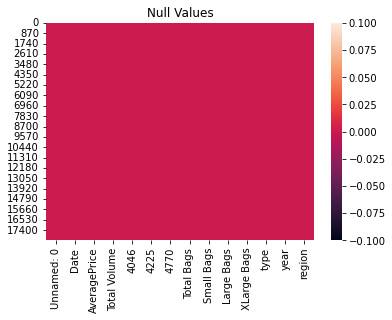

In [16]:
#heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()


In [17]:
#dropping Unnamed:0 and year which have no impact on average sales
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [19]:
#Let's change the Date dtype to datetime series

df['Date']=pd.to_datetime(df['Date'])

In [20]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day

In [21]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
 12  Year          18249 non-null  int64         
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

* After From the above table we can observe the following:

1- We have 18249 rows and 17 columns in our data set.

2- We do no the have any null values in our data set.

3- We have three types of data types (dtypes) in our data set i.e int64, object and float64

4- Day and Year dtype is int64, for Month and region is object and rest all are float64

In [23]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

# Label Encoding the object variables

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["region"] = label.fit_transform(df.region)

In [25]:
#Let's drop the date and type columns

df.drop(['Date','type'],axis=1,inplace=True)

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,26.495644,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,15.583788,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,13.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,26.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,40.000000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,53.000000,2018.000000,12.000000,31.000000


# Checking Correlation

In [28]:
#Let's check the correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,-0.011716,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.174176,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.192073,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.145726,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.095252,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.175256,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.164702,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.198768,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.082281,0.081033,-0.012969,0.000319
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,0.164702,0.198768,0.082281,1.000000,-0.000055,-0.000144,-0.000021


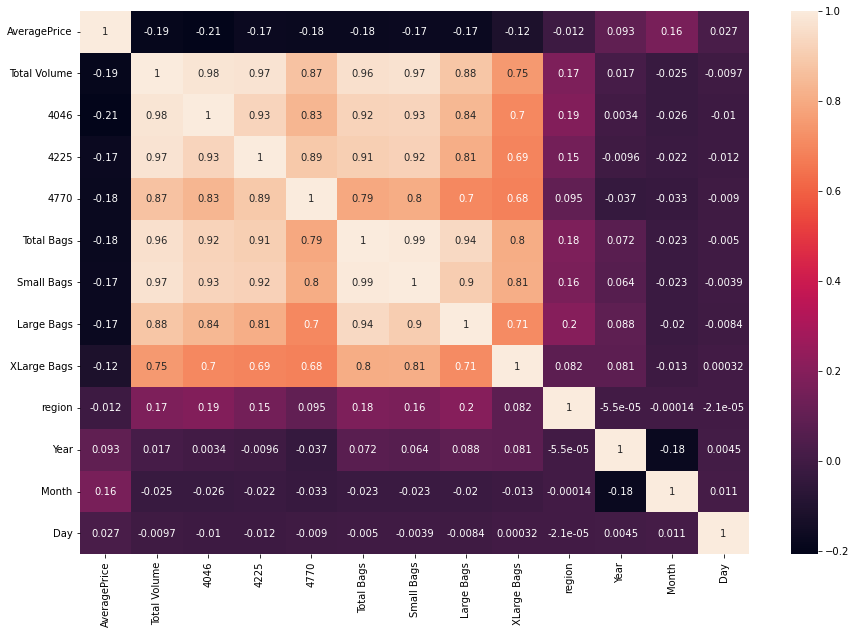

In [29]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

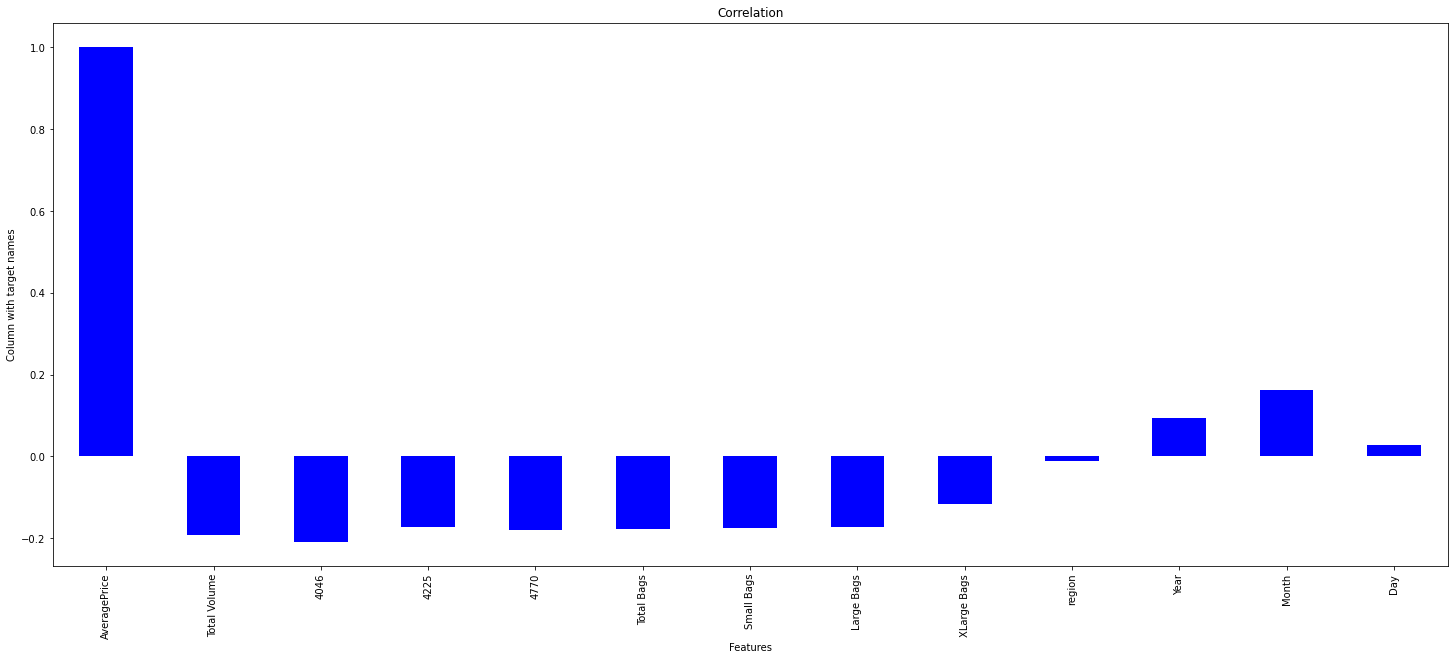

In [30]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].plot(kind = 'bar', color = 'b')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

1- Total volume, Small bags and and total bags are higly correlated


2- Average price and Large, Small bags are higly negative correlated


3- Xlarge bags and region are negatively correlated


4- All columns are less correlated with Average price

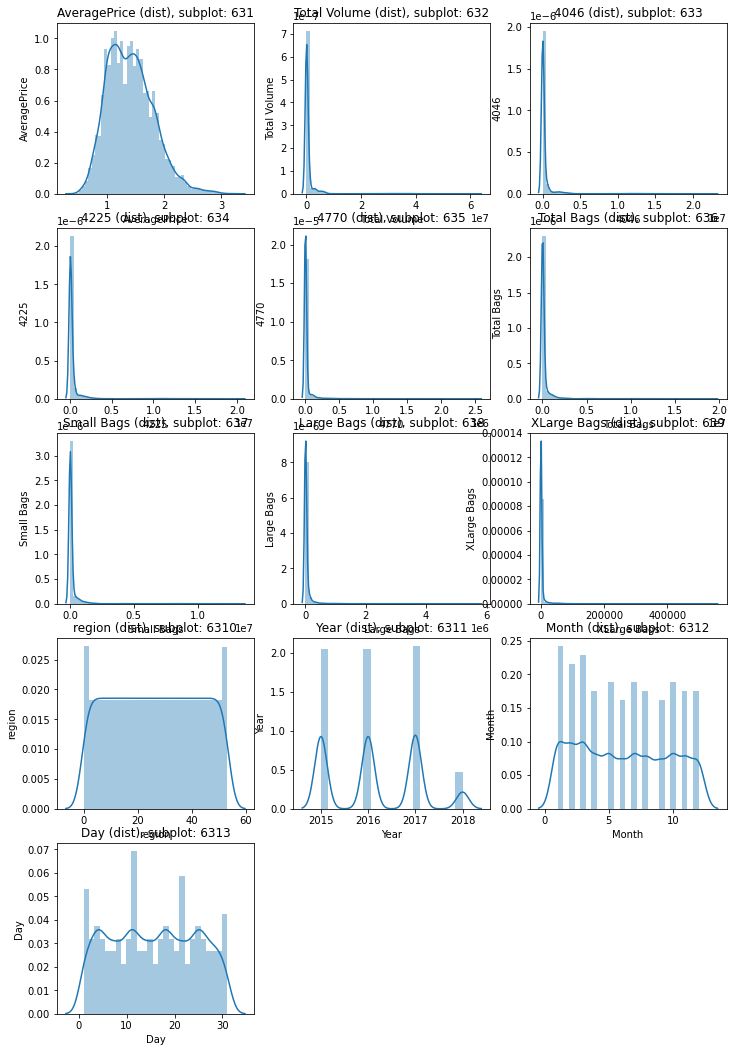

In [31]:
#Distplot for each column
Columns= df.columns

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

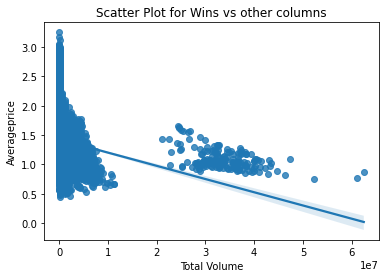

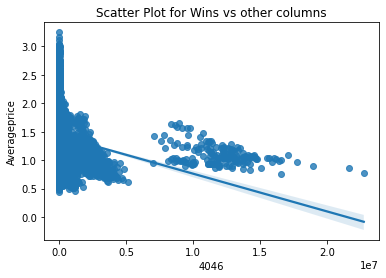

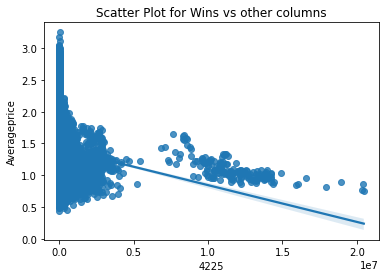

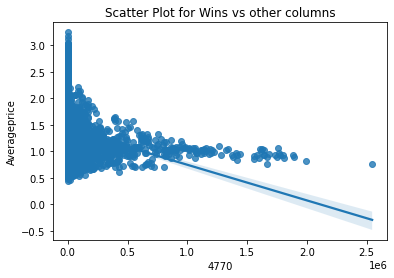

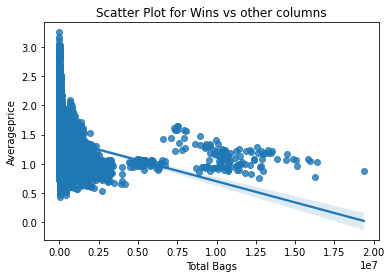

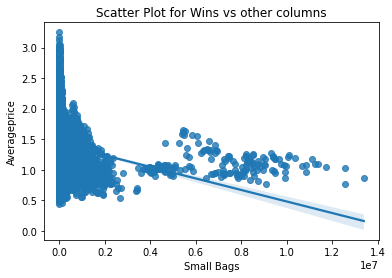

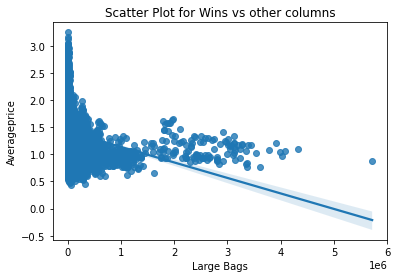

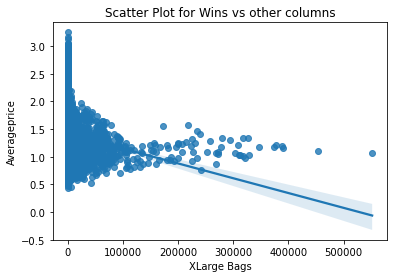

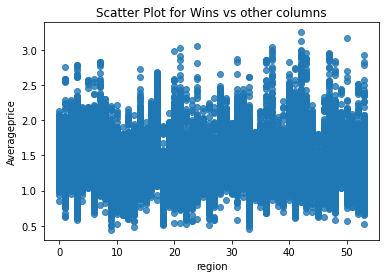

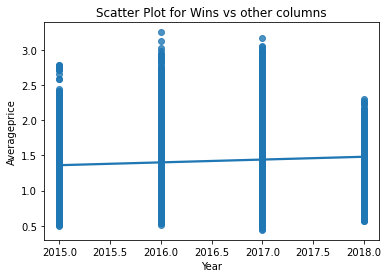

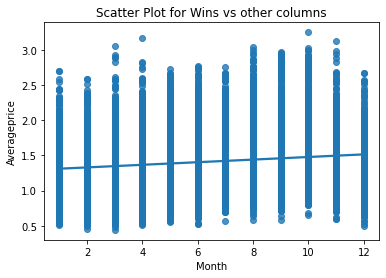

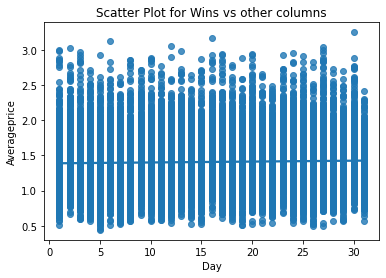

In [32]:
#Checking how W is variated with all columns separately
for i in df.columns[1:]:                                          #bivariate analysis
    plt.figure(figsize = (6, 4))
    sns.regplot(df[i], df['AveragePrice'])
    plt.title('Scatter Plot for Wins vs other columns')
    plt.xlabel(i)
    plt.ylabel('Averageprice')
    plt.show()

1- Due to this columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags ther Averageprice decreases.

2- In all regions the Averageprice is almost same.

3- In year 2015-2016 the Averageprice is increased.

4- In days and months the Average price is almost same.

# Mult Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

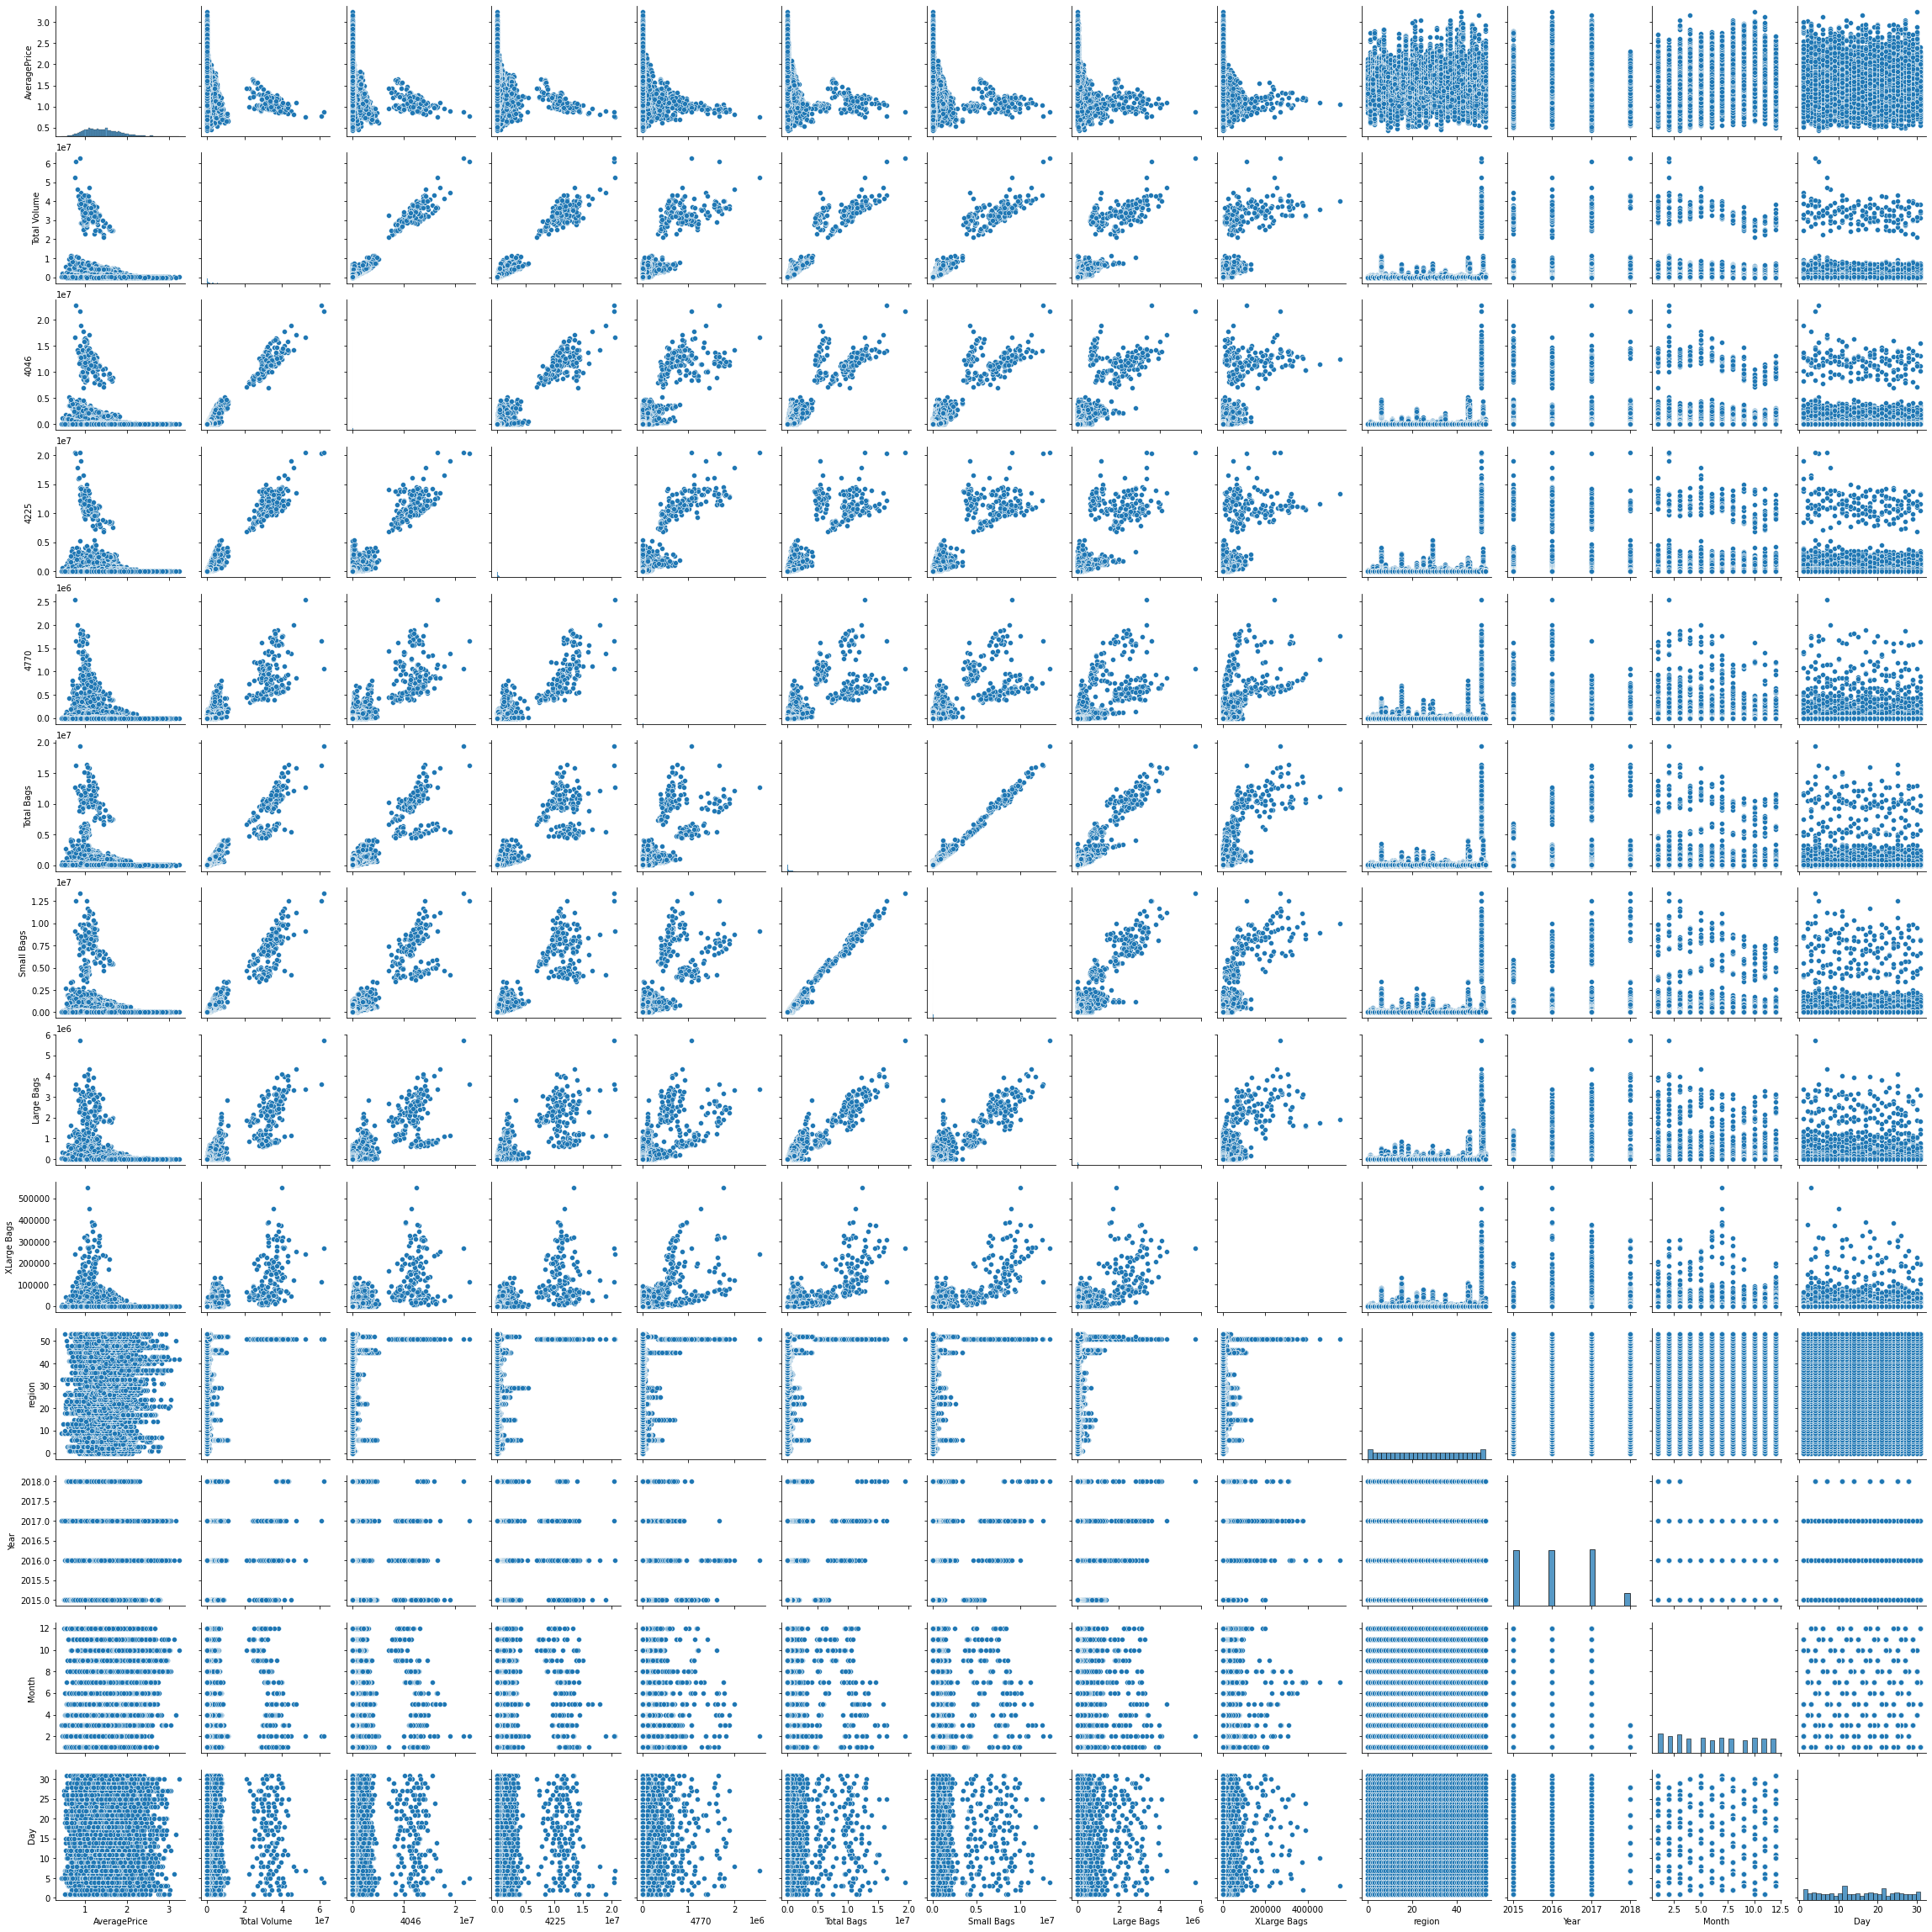

In [33]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show


# Checking outliers using Boxplot

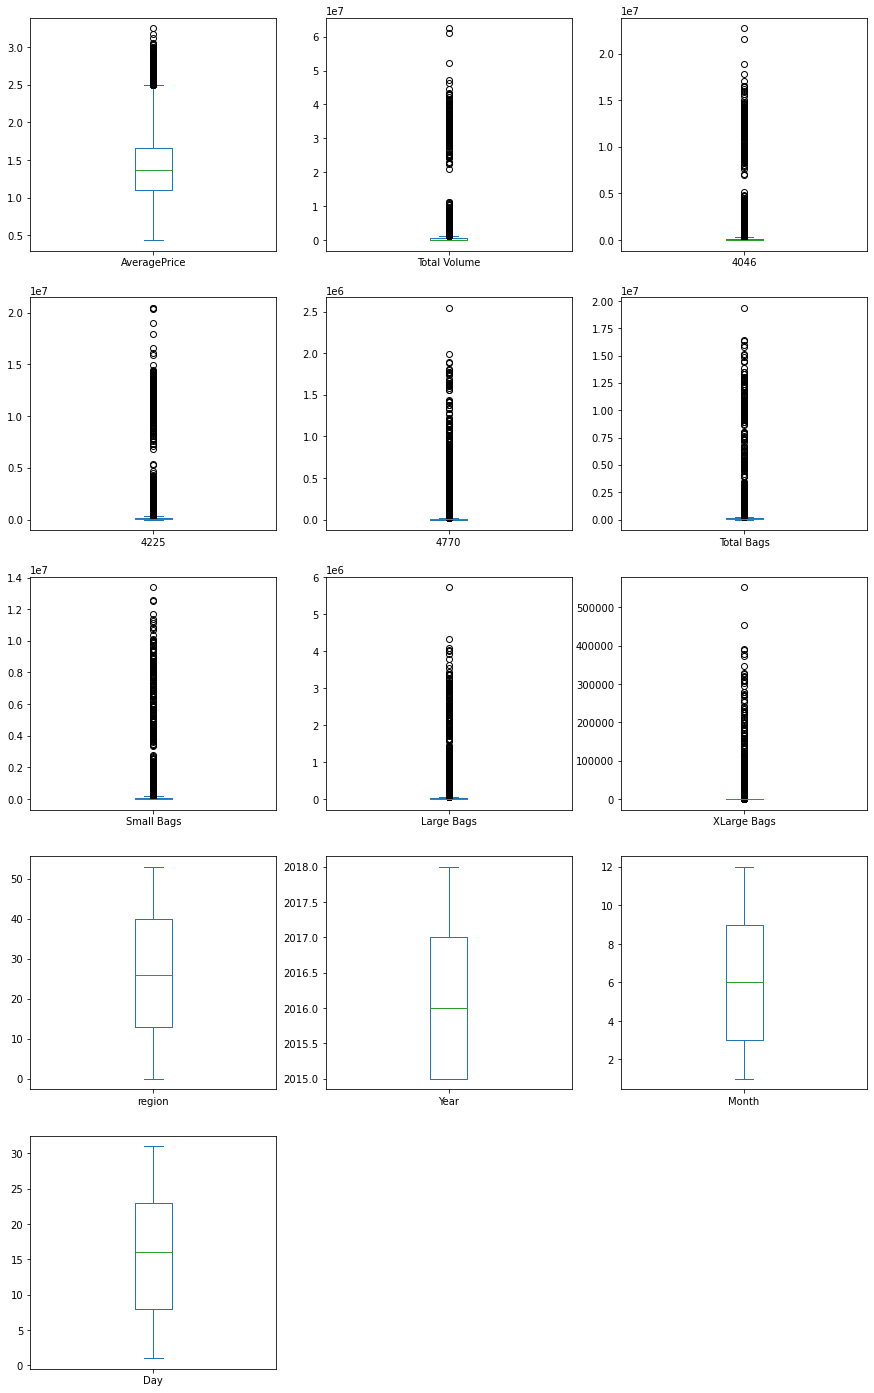

In [35]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

* There are lot ofouliers and lets remove ouliers in next step.

In [36]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [37]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 13)
(17651, 13)


In [38]:
loss_percent=((1517-1436)/1517)*100
loss_percent

5.339485827290705

* Here we loss only 5.3% of data, so we remove outliers.

# Checking Skewness

In [39]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
region           0.000030
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

# Splitting Data in x(independent) and y(dependent)

In [40]:
x = df_new.drop('AveragePrice', axis = 1)
y = df_new['AveragePrice']

In [41]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [42]:
x_new.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
region         -0.257799
Year            0.227731
Month          -0.146554
Day            -0.208926
dtype: float64

In [43]:
#To Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_new)

In [44]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(17651, 12)
(17651,)


# Checking Best Random State

In [45]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = DecisionTreeRegressor()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.7593601512598601 on Random State 389


# Creating Model

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=389)

In [47]:
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']

r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.508028,0.217855,0.074235,0.272461
1,SVR,0.764870,0.141519,0.035479,0.188360
2,DecisionTreeRegressor,0.758791,0.126233,0.036397,0.190779
3,KNeighborsRegressor,0.782140,0.132616,0.032874,0.181311
4,RandomForestRegressor,0.883116,0.094712,0.017637,0.132804
5,AdaBoostRegressor,0.528560,0.219512,0.071137,0.266715
6,GradientBoostingRegressor,0.735175,0.154331,0.039960,0.199901


*** RandomForestRegressor have best r2_score and less errors compare to remaining models. But we check Cross_validation_score for best Model.***

# Checking Cross Validation score

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cross=[]
kf = KFold(n_splits=5, random_state=251, shuffle=True)
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=kf)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.508028,0.504035
1,SVR,0.764870,0.768236
2,DecisionTreeRegressor,0.758791,0.747322
3,KNeighborsRegressor,0.782140,0.793199
4,RandomForestRegressor,0.883116,0.885466
5,AdaBoostRegressor,0.528560,0.502994
6,GradientBoostingRegressor,0.735175,0.724855


* he difference of R2_score and Cross_validation_score for KNeighborsRegressor is less, but the RandomForestRegressor have less errors compared to other model. So we consider RandomForestRegressor as our best model and performing the hyper Tunning.

# Hyper parameter Tuning the Model

In [49]:
from sklearn.model_selection import GridSearchCV

RFC_parameters={'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }

In [50]:
RFC=GridSearchCV(RandomForestRegressor(),RFC_parameters,cv=5) #tuning the model

In [51]:
RFC.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]})

In [53]:
RFC.best_params_ #finding the best parameters for tuning

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [54]:
RFC = RandomForestRegressor(bootstrap=False, max_depth=30,min_samples_leaf = 1, min_samples_split= 2,
                            max_features = 'sqrt', n_estimators = 50)
RFC.fit(x_train,y_train)
print("Score=",RFC.score(x_train,y_train))
predrfc = RFC.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error=', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('\nR2 Score=',r2_score(y_test,predrfc))

Score= 0.9999997326121655
Mean Absolute Error=  0.09090893827000038
Mean squared Error=  0.016515393320719596
Root Mean Absolute Error= 0.30151109145436156

R2 Score= 0.8905490556228772


# Lets plot the final Graph for Actual and Predicted output values

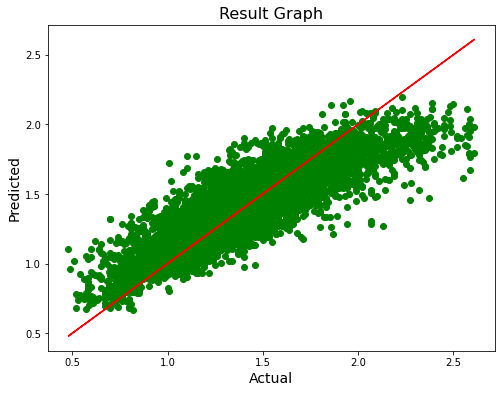

In [55]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

# Saving the model

In [56]:
import pickle, joblib

filename = 'avacado.pkl'
pickle.dump(RFC , open(filename, 'wb'))

# Conclusion


# Loading the Model

In [57]:
RFC=joblib.load('avacado.pkl','rb')
Predicted = RFC.predict(x_test)
Predicted

array([1.6894, 1.605 , 1.0358, ..., 1.0528, 1.7654, 1.043 ])

In [58]:
Final=np.array(y_test)
Final

array([1.61, 1.57, 0.93, ..., 1.  , 1.83, 1.01])

In [59]:
predict=np.array(RFC.predict(x_test))
predict

array([1.6894, 1.605 , 1.0358, ..., 1.0528, 1.7654, 1.043 ])

In [60]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,1.61,1.6894
1,1.57,1.6050
2,0.93,1.0358
3,0.86,0.9356
4,1.64,1.5762
...,...,...
5291,1.40,1.1502
5292,1.68,1.6488
5293,1.00,1.0528
5294,1.83,1.7654


# We have used RandomForestRegressor in this dataset and achieve the accuracy score.It is also used for predicting the Averageprice of the Avacado.

# Classification - Second Phase

* Now we will do the classification part for this problem statement.

* We have to predict the target variable i.e Region,so I will start the model building process.

In [150]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [151]:
#dropping Unnamed:0 and year which have no impact on average sales
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [152]:
#Let's change the Date dtype to datetime series

df['Date']=pd.to_datetime(df['Date'])

In [153]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day

In [154]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [155]:
df.drop(['Date','Total Volume','Total Bags','Month','Day'],axis=1,inplace=True)

In [156]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany,2015
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany,2015
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany,2015
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany,2015
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,WestTexNewMexico,2018
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,WestTexNewMexico,2018
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,WestTexNewMexico,2018
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,WestTexNewMexico,2018


In [157]:
df.drop(['4225','Small Bags'],axis=1,inplace=True)

In [158]:
df

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,region,Year
0,1.33,1036.74,48.16,93.25,0.0,conventional,Albany,2015
1,1.35,674.28,58.33,97.49,0.0,conventional,Albany,2015
2,0.93,794.70,130.50,103.14,0.0,conventional,Albany,2015
3,1.08,1132.00,72.58,133.76,0.0,conventional,Albany,2015
4,1.28,941.48,75.78,197.69,0.0,conventional,Albany,2015
...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,organic,WestTexNewMexico,2018
18245,1.71,1191.70,0.00,324.80,0.0,organic,WestTexNewMexico,2018
18246,1.87,1191.92,727.94,42.31,0.0,organic,WestTexNewMexico,2018
18247,1.93,1527.63,727.01,50.00,0.0,organic,WestTexNewMexico,2018


# Label Encoding the object variables


In [159]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["region"] = label.fit_transform(df.region)
df["type"] = label.fit_transform(df.type)
df["Year"] = label.fit_transform(df.Year)


In [160]:
df

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,region,Year
0,1.33,1036.74,48.16,93.25,0.0,0,0,0
1,1.35,674.28,58.33,97.49,0.0,0,0,0
2,0.93,794.70,130.50,103.14,0.0,0,0,0
3,1.08,1132.00,72.58,133.76,0.0,0,0,0
4,1.28,941.48,75.78,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,1,53,3
18245,1.71,1191.70,0.00,324.80,0.0,1,53,3
18246,1.87,1191.92,727.94,42.31,0.0,1,53,3
18247,1.93,1527.63,727.01,50.00,0.0,1,53,3


In [161]:
#checking my target variable
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

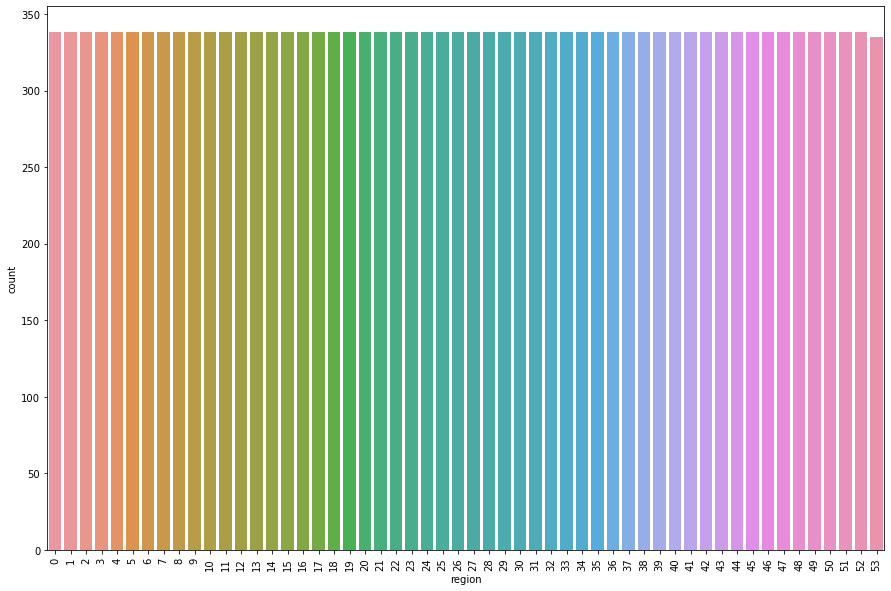

In [162]:
plt.figure(figsize=(15,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

In [163]:
df['region'].shape

(18249,)

Since our target variable is region , I made a condition i.e the value 27 or higher getting classified will be termed as 'good/1' and the remainder as 'not good/0'.

0 - refers to North America 1 - refers to South America

In [164]:
df['region'] = df['region'].replace(0,0)
df['region'] = df['region'].replace(1,0)
df['region'] = df['region'].replace(2,0)
df['region'] = df['region'].replace(3,0)
df['region'] = df['region'].replace(4,0)
df['region'] = df['region'].replace(5,0)

In [165]:
df['region'] = df['region'].replace(6,0)
df['region'] = df['region'].replace(7,0)
df['region'] = df['region'].replace(8,0)
df['region'] = df['region'].replace(9,0)
df['region'] = df['region'].replace(10,0)

df['region'] = df['region'].replace(11,0)
df['region'] = df['region'].replace(12,0)
df['region'] = df['region'].replace(13,0)
df['region'] = df['region'].replace(14,0)
df['region'] = df['region'].replace(15,0)
df['region'] = df['region'].replace(16,0)
df['region'] = df['region'].replace(17,0)
df['region'] = df['region'].replace(18,0)
df['region'] = df['region'].replace(19,0)
df['region'] = df['region'].replace(20,0)

df['region'] = df['region'].replace(21,0)
df['region'] = df['region'].replace(22,0)
df['region'] = df['region'].replace(23,0)
df['region'] = df['region'].replace(24,0)
df['region'] = df['region'].replace(25,0)
df['region'] = df['region'].replace(26,0)
df['region'] = df['region'].replace(27,0)
df['region'] = df['region'].replace(28,1)
df['region'] = df['region'].replace(29,1)
df['region'] = df['region'].replace(30,1)

In [166]:
df['region'] = df['region'].replace(31,1)
df['region'] = df['region'].replace(32,1)
df['region'] = df['region'].replace(33,1)
df['region'] = df['region'].replace(34,1)
df['region'] = df['region'].replace(35,1)
df['region'] = df['region'].replace(36,1)
df['region'] = df['region'].replace(37,1)
df['region'] = df['region'].replace(38,1)
df['region'] = df['region'].replace(39,1)
df['region'] = df['region'].replace(40,1)

df['region'] = df['region'].replace(41,1)
df['region'] = df['region'].replace(42,1)
df['region'] = df['region'].replace(43,1)
df['region'] = df['region'].replace(44,1)
df['region'] = df['region'].replace(45,1)
df['region'] = df['region'].replace(46,1)
df['region'] = df['region'].replace(47,1)
df['region'] = df['region'].replace(48,1)
df['region'] = df['region'].replace(49,1)
df['region'] = df['region'].replace(50,1)

df['region'] = df['region'].replace(51,1)
df['region'] = df['region'].replace(52,1)
df['region'] = df['region'].replace(53,1)
df['region'] = df['region'].replace(54,1)

In [167]:
df['region'].value_counts()

0    9464
1    8785
Name: region, dtype: int64

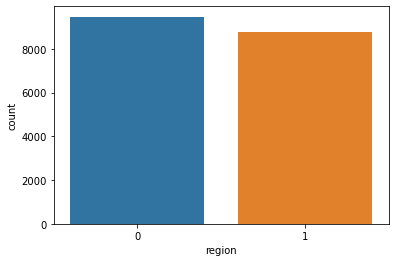

In [168]:
sns.countplot(df['region']);

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label respectively.

In [169]:
X_classification = df.drop(['region'],axis=1)
Y_classification = df['region']

In [170]:
X_classification.head()

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,Year
0,1.33,1036.74,48.16,93.25,0.0,0,0
1,1.35,674.28,58.33,97.49,0.0,0,0
2,0.93,794.70,130.50,103.14,0.0,0,0
3,1.08,1132.00,72.58,133.76,0.0,0,0
4,1.28,941.48,75.78,197.69,0.0,0,0


In [171]:
Y_classification.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

# Converting an Imbalanced Dataset to Balanced Dataset

In [172]:
Y_classification.value_counts()

0    9464
1    8785
Name: region, dtype: int64

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
oversample = SMOTE(0.96)
X_classification, Y_classification = oversample.fit_resample(X_classification, Y_classification)

In [175]:
Y_classification.value_counts()

0    9464
1    9085
Name: region, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [178]:
X_scaled_classification = pd.DataFrame(scaler.fit_transform(X_classification),columns=X_classification.columns)

X_scaled_classification.head()

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,Year
0,-0.189778,-0.231125,-0.211216,-0.222620,-0.175665,-0.997147,-1.217146
1,-0.140070,-0.231410,-0.211122,-0.222603,-0.175665,-0.997147,-1.217146
2,-1.183931,-0.231315,-0.210456,-0.222580,-0.175665,-0.997147,-1.217146
3,-0.811124,-0.231051,-0.210990,-0.222455,-0.175665,-0.997147,-1.217146
4,-0.314047,-0.231200,-0.210961,-0.222195,-0.175665,-0.997147,-1.217146


In [179]:
X_scaled_classification.skew()

AveragePrice     0.578726
4046             8.555488
4770            10.111733
Large Bags       9.692852
XLarge Bags     13.038093
type             0.005715
Year             0.221654
dtype: float64

 Use Power Transformer to transform the skewness part.

In [180]:
from sklearn.preprocessing import PowerTransformer

In [181]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X_scaled_classification = pd.DataFrame(p_transform.fit_transform(X_scaled_classification), columns=X_scaled_classification.columns)
X_scaled_classification.head(5)

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,Year
0,-0.083371,-0.703361,-0.621273,-0.731477,-0.496173,-0.997147,-1.264133
1,-0.029911,-0.708121,-0.619487,-0.731186,-0.496173,-0.997147,-1.264133
2,-1.287212,-0.706539,-0.606842,-0.730798,-0.496173,-0.997147,-1.264133
3,-0.808535,-0.702111,-0.616986,-0.728696,-0.496173,-0.997147,-1.264133
4,-0.220218,-0.704611,-0.616425,-0.724312,-0.496173,-0.997147,-1.264133


In [182]:
X_scaled_classification.skew()

AveragePrice    0.036018
4046            1.302166
4770            1.464207
Large Bags      1.235556
XLarge Bags     1.851835
type            0.005715
Year            0.054451
dtype: float64

In [183]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X_scaled_classification = pd.DataFrame(p_transform.fit_transform(X_scaled_classification), columns=X_scaled_classification.columns)
X_scaled_classification.head(5)

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,Year
0,-0.078641,-0.884645,-0.767976,-0.948796,-0.597404,-0.997147,-1.27158
1,-0.025138,-0.899513,-0.761136,-0.947886,-0.597404,-0.997147,-1.27158
2,-1.290660,-0.894563,-0.713156,-0.946673,-0.597404,-0.997147,-1.27158
3,-0.807343,-0.880753,-0.751585,-0.940115,-0.597404,-0.997147,-1.27158
4,-0.215754,-0.888544,-0.749445,-0.926477,-0.597404,-0.997147,-1.27158


In [184]:
X_scaled_classification.skew()

AveragePrice    0.015345
4046            0.554096
4770            0.751249
Large Bags      0.535282
XLarge Bags     1.227229
type            0.005715
Year            0.028107
dtype: float64

Use Power Transformer to transform the skewness part.

In [185]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X_scaled_classification = pd.DataFrame(p_transform.fit_transform(X_scaled_classification), columns=X_scaled_classification.columns)
X_scaled_classification.head(5)

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,Year
0,-0.078427,-0.959366,-0.827125,-1.056928,-0.653594,-0.997147,-1.272785
1,-0.024923,-0.986838,-0.811148,-1.055308,-0.653594,-0.997147,-1.272785
2,-1.290814,-0.977671,-0.701315,-1.053150,-0.653594,-0.997147,-1.272785
3,-0.807287,-0.952204,-0.788972,-1.041494,-0.653594,-0.997147,-1.272785
4,-0.215552,-0.966551,-0.784026,-1.017356,-0.653594,-0.997147,-1.272785


In [186]:
X_scaled_classification.skew()

AveragePrice    0.014415
4046            0.310410
4770            0.476284
Large Bags      0.257392
XLarge Bags     0.974036
type            0.005715
Year            0.023846
dtype: float64

In [187]:
X_scaled_classification.shape

(18549, 7)

In [188]:
Y_classification.shape

(18549,)

# Model Building for Classification Part

# Logistic Regression

In [189]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr_c = lr.predict(x_test)
    accuracy_lr_classification = accuracy_score(y_test, y_lr_c)
    
    if accuracy_lr_classification>maxAccuracy:
        maxAccuracy=accuracy_lr_classification
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.6001796945193172  on Random State 85


In [190]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=85)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr_c = lr.predict(x_test)
accuracy_lr_classification = accuracy_score(y_test, y_lr_c)

#Accuracy Score
print("Accuracy score : ", accuracy_lr_classification)

print("---------------------------------------------")

#Cross Validation Score
cross_val_lr_classification = cross_val_score(lr,X_scaled_classification,Y_classification,cv=5)
print(cross_val_lr_classification)
print("Cross Validation Score : ",cross_val_lr_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr_c))

Accuracy score :  0.6001796945193172
---------------------------------------------
[0.55687332 0.55714286 0.55768194 0.60242588 0.53976813]
Cross Validation Score :  0.5627784241580363
---------------------------------------------
[[1743 1075]
 [1150 1597]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      2818
           1       0.60      0.58      0.59      2747

    accuracy                           0.60      5565
   macro avg       0.60      0.60      0.60      5565
weighted avg       0.60      0.60      0.60      5565



In [191]:
#K-fold cross validation
K_fold = KFold(5,random_state=85,shuffle=True)
print(K_fold)
l1_c = cross_val_score(lr,X_scaled_classification,Y_classification,cv=K_fold)
print(l1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1_c.mean())

KFold(n_splits=5, random_state=85, shuffle=True)
[0.59433962 0.58409704 0.58598383 0.59703504 0.57400917]
--------------------------------------------------
K-Fold Cross Validation Score :  0.5870929384995629


In [192]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=85)
print(shuffle)
l2_c = cross_val_score(lr,X_scaled_classification,Y_classification,cv=shuffle)
print(l2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",l2_c.mean())

ShuffleSplit(n_splits=5, random_state=85, test_size=0.3, train_size=None)
[0.60017969 0.59424978 0.58957772 0.59191375 0.58310872]
--------------------------------------------------
Shuffle Split :  0.5918059299191374


# Decision Tree

In [193]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt_c = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt_c)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8185085354896675  on Random State 82


In [194]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=48)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt_c = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt_c)

#Accuracy Score
print("Accuracy score : ", accuracy_dt)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=5)
print(cross_val_dt_c)
print("Cross Validation Score : ",cross_val_dt_c.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt_c))

Accuracy score :  0.8204851752021564
---------------------------------------------
[0.65390836 0.64070081 0.64097035 0.64070081 0.51415476]
Cross Validation Score :  0.6180870164290402
---------------------------------------------
[[2291  489]
 [ 510 2275]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2780
           1       0.82      0.82      0.82      2785

    accuracy                           0.82      5565
   macro avg       0.82      0.82      0.82      5565
weighted avg       0.82      0.82      0.82      5565



In [195]:
#K-fold cross validation
K_fold = KFold(5,random_state=48,shuffle=True)
print(K_fold)
d1_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=K_fold)
print(d1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1_c.mean())

KFold(n_splits=5, random_state=48, shuffle=True)
[0.81051213 0.8212938  0.80916442 0.8097035  0.80911297]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8119573645805097


In [196]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=48)
print(shuffle)
d2_c = cross_val_score(dt,X_scaled_classification,Y_classification,cv=shuffle)
print(d2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",d2_c.mean())

ShuffleSplit(n_splits=5, random_state=48, test_size=0.3, train_size=None)
[0.81383648 0.81545373 0.80161725 0.80826595 0.806469  ]
--------------------------------------------------
Shuffle Split :  0.8091284815813118


# KNN

In [197]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn_c = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn_c)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8043126684636118  on Random State 40


In [198]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=40)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn_c = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn_c)

#Accuracy Score
print("Accuracy score : ", accuracy_knn)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn_classification = cross_val_score(knn,X_scaled_classification,Y_classification,cv=5)
print(cross_val_knn_classification)
print("Cross Validation Score : ",cross_val_knn_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn_c))

Accuracy score :  0.8043126684636118
---------------------------------------------
[0.50377358 0.49973046 0.55525606 0.56145553 0.51442437]
Cross Validation Score :  0.5269280013139163
---------------------------------------------
[[2277  530]
 [ 559 2199]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2807
           1       0.81      0.80      0.80      2758

    accuracy                           0.80      5565
   macro avg       0.80      0.80      0.80      5565
weighted avg       0.80      0.80      0.80      5565



In [199]:
#K-fold cross validation
K_fold = KFold(5,random_state=40,shuffle=True)
print(K_fold)
k1_c = cross_val_score(knn,X_scaled_classification,Y_classification,cv=K_fold)
print(k1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1_c.mean())

KFold(n_splits=5, random_state=40, shuffle=True)
[0.81590296 0.78948787 0.79380054 0.78113208 0.7891615 ]
--------------------------------------------------
K-Fold Cross Validation Score :  0.7938969898382241


In [200]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=40)
print(shuffle)
k2_c = cross_val_score(knn,X_scaled_classification,Y_classification,cv=shuffle)
print(k2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",k2_c.mean())

ShuffleSplit(n_splits=5, random_state=40, test_size=0.3, train_size=None)
[0.80431267 0.78903863 0.7802336  0.79712489 0.79245283]
--------------------------------------------------
Shuffle Split :  0.7926325247079964


# Random Forest

In [201]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf_c = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf_c)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8840970350404312  on Random State 29


In [202]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_classification, Y_classification, test_size=0.30, random_state=96)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf_c = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf_c)

#Accuracy Score
print("Accuracy score : ", accuracy_rf)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf_classification = cross_val_score(rf,X_scaled_classification,Y_classification,cv=5)
print(cross_val_rf_classification)
print("Cross Validation Score : ",cross_val_rf_classification.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf_c))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf_c))

Accuracy score :  0.8828391734052111
---------------------------------------------
[0.60943396 0.6902965  0.6541779  0.67061995 0.52925317]
Cross Validation Score :  0.6307562939713192
---------------------------------------------
[[2500  287]
 [ 365 2413]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2787
           1       0.89      0.87      0.88      2778

    accuracy                           0.88      5565
   macro avg       0.88      0.88      0.88      5565
weighted avg       0.88      0.88      0.88      5565



In [203]:
#K-fold cross validation
K_fold = KFold(5,random_state=96,shuffle=True)
print(K_fold)
r1_c = cross_val_score(rf,X_scaled_classification,Y_classification,cv=K_fold)
print(r1_c)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1_c.mean())

KFold(n_splits=5, random_state=96, shuffle=True)
[0.89002695 0.87951482 0.87493261 0.87439353 0.88460501]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8806945878714194


In [204]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=96)
print(shuffle)
r2_c = cross_val_score(rf,X_scaled_classification,Y_classification,cv=shuffle)
print(r2_c)
print("--------------------------------------------------")
print("Shuffle Split : ",r2_c.mean())

ShuffleSplit(n_splits=5, random_state=96, test_size=0.3, train_size=None)
[0.88068284 0.87565139 0.87421384 0.87583109 0.86954178]
--------------------------------------------------
Shuffle Split :  0.8751841868823002


# ROC_AUC

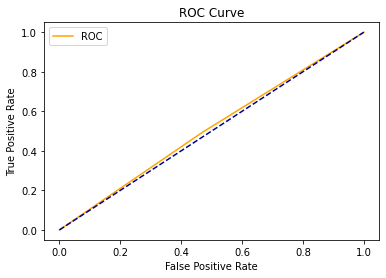

0.5119176041804708

In [205]:
fpr,tpr ,thresholds = roc_curve(y_test,y_lr_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score_c = roc_auc_score(y_test,y_lr_c)
auc_score_c

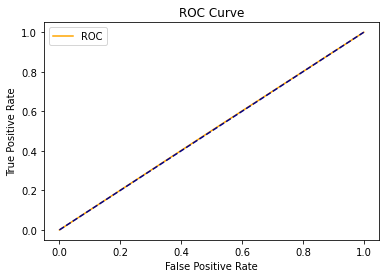

0.5011626411114236

In [206]:
fpr,tpr ,thresholds = roc_curve(y_test,y_dt_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_dt_c)
auc_score

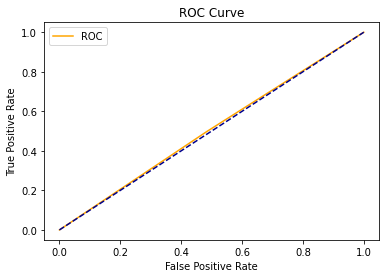

0.5067230143655247

In [207]:
fpr,tpr ,thresholds = roc_curve(y_test,y_knn_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_knn_c)
auc_score

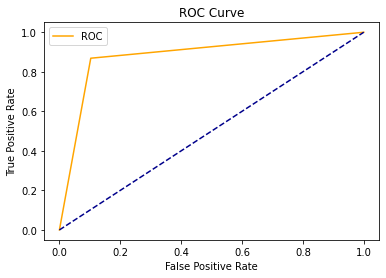

0.8828161992465792

In [208]:
fpr,tpr ,thresholds = roc_curve(y_test,y_rf_c)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_rf_c)
auc_score


# Hyperparameter Tuning

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
#Choosing Random Forest Classifier

param_grid = {
    'n_estimators' : [120,150,175,200],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split': [1,2,3],
    'max_features' : ['sqrt','log2']
}

After comparing all the regression models I have selected Random Forest as my best model and have listed down it's parameters above referring the sklearn webpage

In [211]:
gradient_search_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)

In [212]:
gradient_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [120, 150, 175, 200]})

In [213]:
gradient_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [214]:
gradient_search_rf.best_score_

0.7734140910485193

 Based on best params , I have incorporated the params in my final model.

RandomForestClassifier(max_depth=8, random_state=96)
------------------------------------------------------------------------
[1 1 0 ... 1 0 1]
Accuracy Score : 0.7730458221024259
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.77      0.78      0.78      2787
           1       0.78      0.76      0.77      2778

    accuracy                           0.77      5565
   macro avg       0.77      0.77      0.77      5565
weighted avg       0.77      0.77      0.77      5565

-------------------------------------------------------------------------
Confusion Matrix 
------------------------------------------------------------------------


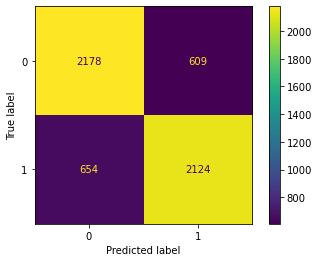

In [215]:
final_model = RandomForestClassifier(criterion='gini',max_depth=8, min_samples_split=2,max_features='sqrt', n_estimators=100,random_state=96)
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")
print("Confusion Matrix ")
print(plot_confusion_matrix(final_model,x_test,y_test))
print("------------------------------------------------------------------------")

I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it

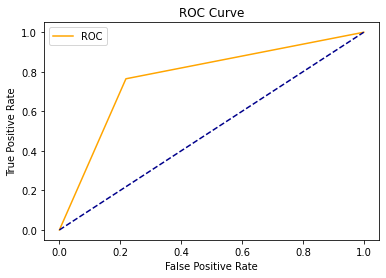

77.30321509693647

In [216]:
fpr,tpr ,thresholds = roc_curve(y_test,final_model_pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,final_model_pred)
auc_score*100

# Save the best model

In [217]:
import pickle

In [218]:
filename = 'Avocado.pkl'
pickle.dump(final_model,open(filename,'wb'))